# Filtros de tempo contínuo

Renato Naville Watanabe


## Preparação do ambiente

In [62]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

In [63]:
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.signal import bode
%matplotlib widget

## Definição

**Filtro** é um sistema (neste curso um sistema linear e invariante no tempo) que modifica o espectro do sinal de entrada. Existem muitos usos para filtros, como remover ruído ou suavizar componentes de frequências rápidas do sinal de entrada.

Pensando no contexto de sinais periódicos, podemos escrever um sinal periódico como:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk\omega_0 t}$

em que $c_k$ são os coeficientes da série de Fourier e $\omega_0$ é a frequência fundamental  do sinal.

Nesse caso, a saída de um sistema linear e invariante no tempo é:

$y(t) = \displaystyle\sum_{k=-\infty}^\infty c_kH(j\omega_0k)e^{jk\omega_0 t}$

com $H(j\omega)$ sendo a resposta em frequência do sistema. 

Então, os termos do sinal de entrada nas frequências em que o ganho da resposta em frequência é baixo são atenuadas (ou completamente eliminadas) no sinal de saída do sistema.

Pensando no contexto de sinais não periódicos, o resultado é o mesmo. Pela propriedade da convolução da transformada de Fourier, o espectro do sinal de saída de um sistema linear e invariante no tempo é:

$Y(j\omega) = H(j\omega)X(j\omega)$

em que $X(j\omega)$ é a transformada de Fourier do sinal de entrada.

Então, para sinais não periódicos, o sistema atenua ou elimina as partes do sinal de entrada com frequências em que o ganho da resposta em frequência é baixo.




## Classificação de filtros

Existem diversos tipos de filtros. Uma das maneiras mais comuns de classificá-los é de acordo com a frequência que o filtro rejeita.

### Filtro passa-baixas

O **filtro passa-baixas** atenua ou elimina os termos com frequências mais altas. No gráfico abaixo, em vermelho tracejado é mostrada a curva do ganho de um filtro passa-baixas ideal. 

O filtro passa-baixas ideal elimina completamente qualquer termo com frequências acima de $\omega_c$, conhecida como **frequência de corte**, que possa ter no sinal de entrada. Os termos do sinal de entrada com frequência menor do que a frequência de corte são multiplicados pelo **ganho DC** $M_0$. **Banda passante** é o intervalo de frequências em que o ganho fica acima de $\frac{1}{\sqrt{2}}M_0$.

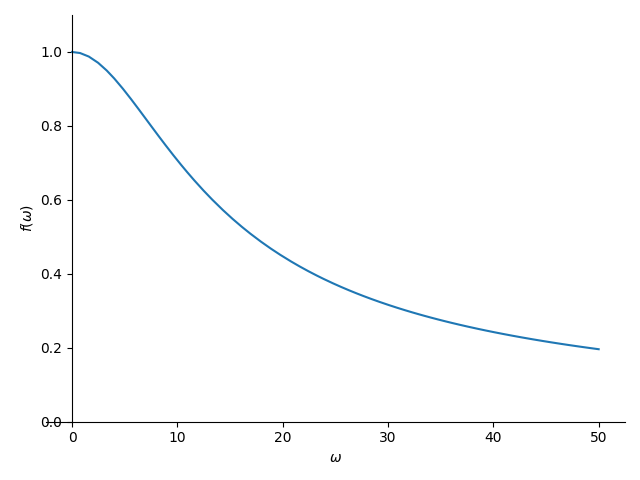

In [64]:
omega = sym.symbols('\omega')
wc = 10
p1=sym.plot(10/sym.sqrt(omega**2+wc**2), (omega, 0, 50), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([wc])
ax.set_xticklabels([r'$\omega_c$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([wc, wc, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([wc, wc, 0], [0, 1, 1], color='red', ls='--')
ax.arrow(19,0.18,-7,-0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(0.2,0.3,9.8,0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(8,0.3,-8,0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(14.95,0.81,-4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(40,0.4,-5, -0.1, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequência de corte')
plt.text(1, 0.35, '  banda \n passante')
plt.text(15, 0.8, '  filtro ideal')
plt.text(40, 0.4, '  filtro real')
fig.canvas.draw_idle()

---

### Exemplo 1

Considere o filtro passa-baixas ideal com a seguinte resposta em frequência.

$H(j\omega) = \left\{\begin{array}{cc}1& |\omega|<10\pi \text{ rad/s} \\ 0 &, |\omega|>10\pi \text{ rad/s} \end{array}\right.$

Vamos encontrar a saída desse sistema para a seguinte entrada:

$x(t) = 2+\mathrm{sen}(3\pi t) + \cos\left(100\pi t+\frac{\pi}{2}\right)$

A saída de um sistema linear e invariante no tempo para uma entrada senoidal de frequência $\omega_0$  é:

$H(j\omega_0)\mathrm{sen}(\omega_0t)$

Como a frequência de corte desse sistema é $\omega_c=10\pi$ rad/s, qualquer termo com frequência maior que essa frequência é eliminada da saída. Nas frequências abaixo da frequência de corte o ganho do filtro é 1 e a fase é zeroEntão:

$y(t) = 2+\mathrm{sen}(3\pi t)$

---

---

### Exemplo 2

Vamos considerar o mesmo filtro do exemplo 1:

$H(j\omega) = \left\{\begin{array}{cc}1& |\omega|<10\pi \text{ rad/s} \\ 0 &, |\omega|>10\pi \text{ rad/s} \end{array}\right. = \mathrm{rect}\left(\frac{\omega}{20\pi}\right)$

Agora vamos encontrar a resposta ao impulso desse filtro.

Para isso, basta fazer a transformada inversa de Fourier (equação de síntese do sinal) da resposta em frequência do sinal. Já vimos anteriormente que a transformada inversa de Fourier de $\mathrm{rect}(\frac{\omega}{2T\pi})$ é $\mathrm{sinc}(Tt)$. Então, a resposta ao impulso do sistema é:

$h(t) = \mathrm{sinc}(10t)$

O gráfico da resposta ao impulso está mostrado abaixo:



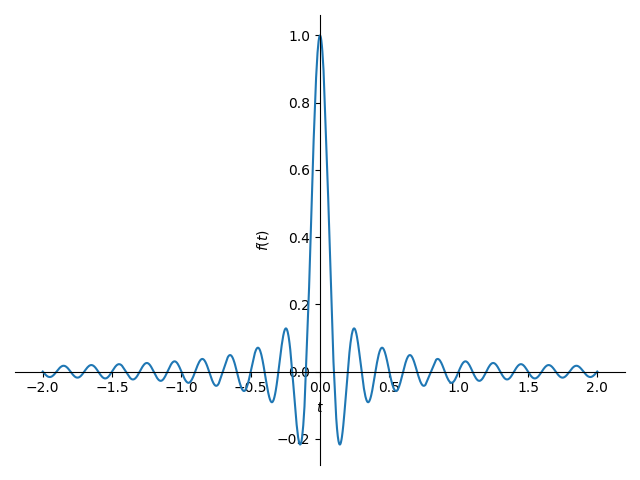

In [65]:
t = sym.symbols('t')
h = sym.sin(10*np.pi*t)/(10*np.pi*t)
sym.plot(h, (t, -2, 2))

Como é possível ver pelo gráfico da resposta ao impulso, esse filtro é um sistema não-causal. Além disso, a resposta ao impulso começa em $t=-\infty$. Essa é a razão de ser *impossível* construir um filtro ideal (um sistema não possível de ser construído é dito ser **não-realizável**). 

---

Para contornar o problema de filtros ideais não serem realizáveis são utilizados fitros não ideais, como o da curva contínua mostrada no gráfico no começo da seção. Os filtros reais tentam se aproximar dos filtros ideais, mas são **realizáveis** por serem sistemas causais.




---
### Exemplo 3

Considere um filtro com a seguinte resposta em frequência.

$H(j\omega) = \frac{10\pi}{j\omega+10\pi}$

A resposta ao impulso desse sistema é:

$h(t) = 10\pi e^{-j10\pi t}u(t)$

Portanto esse filtro é um sistema causal.

O módulo desse filtro é:

$|H(j\omega)| = \frac{10\pi}{\sqrt{\omega^2+100\pi^2}}$

A fase desse filtro é:

$\angle{H(j\omega)} = -\arctan\left(\frac{\omega}{10\pi}\right)$

O gráfico do módulo e da fase dessa resposta em frequência são mostrados abaixo:


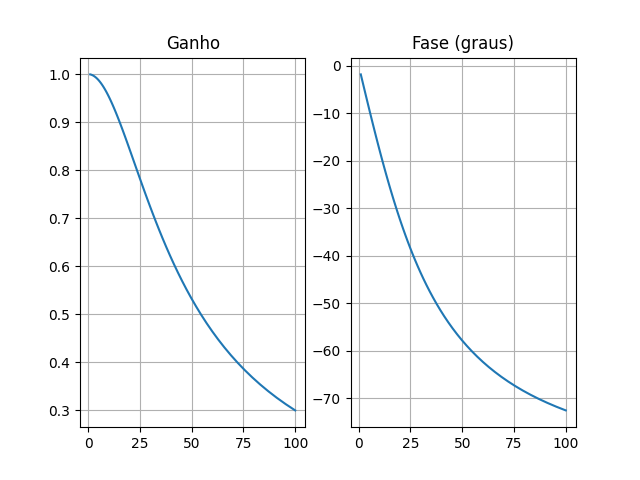

In [30]:
w, ganho, fase = bode(([10*np.pi],[1, 10*np.pi]))
plt.figure()
plt.subplot(1,2,1)
plt.plot(w, 10**(ganho/20))
plt.title('Ganho')
plt.grid()
plt.subplot(1,2,2)
plt.plot(w, fase)
plt.title('Fase (graus)')
plt.grid()
plt.show()

Pelo gráfico podemos ver que o ganho DC $M_0$ do filtro é 1.

A frequência de corte de um filtro é definida com sendo a frequência em que o ganho é $\frac{1}{\sqrt{2}}M_0\approx 0.707M_0$. Essa frequência é:

$|H(j\omega_c)|=\frac{10\pi}{\sqrt{\omega_c^2+100\pi^2}} = \frac{1}{\sqrt{2}} \rightarrow \frac{100\pi^2}{\omega_c^2+100\pi^2} = \frac{1}{2} $

Então, a frequência de corte do filtro é:

$\omega_c = 10\pi$

que é o valor do polo do sistema, em módulo. Isso é possível de se ver pelo gráfico do ganho acima também.

Se o ganho estiver expresso em dB, a frequência de corte corresponde à frequência em que o ganho tem:

$20\log_{10}(|H(j\omega_c)|) = 20\log_{10}\left(\frac{1}{\sqrt{2}}M_0\right) = 20\log_{10}(M_0) + 20\log_{10}\left(\frac{1}{\sqrt{2}}\right) = 20\log_{10}(M_0) + 10\log_{10}\left(\frac{1}{2}\right) = 20\log_{10}(M_0) + 10\cdot(-0.3) = 20\log_{10}(M_0)-3dB$

Ou seja, a frequência de corte é onde o ganho fica 3 dB abaixo do ganho DC. Isso é possível ver se fizermos o gráfico do ganho em dB.


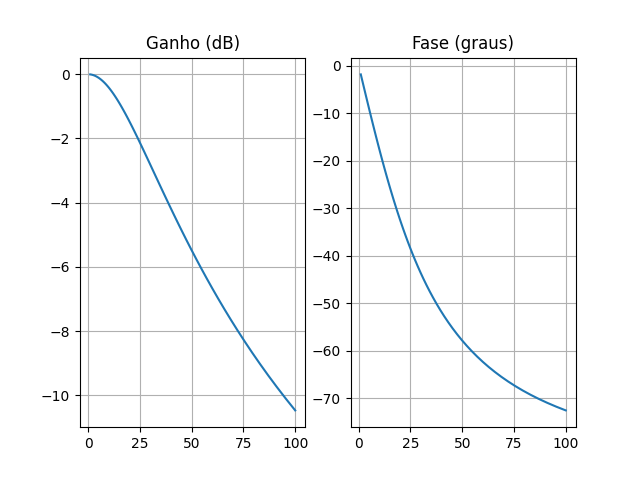

In [32]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(w, ganho)
plt.title('Ganho (dB)')
plt.grid()
plt.subplot(1,2,2)
plt.plot(w, fase)
plt.title('Fase (graus)')
plt.grid()
plt.show()

---

### Exemplo 4

Vamos agora encontrar a saída do filtro do exemplo 3 para a mesma entrada do exemplo 1.

$x(t) = 2+\mathrm{sen}(3\pi t) + \cos\left(100\pi t+\frac{\pi}{2}\right)$

Esse sinal tem componentes em 3 frequências: 0, $3\pi$ e $100\pi$.

Usando as expressões encontradas no exemplo anterior:

$|H(j0)| = 1, \quad |H(j3\pi)| = \frac{10\pi}{\sqrt{9\pi^2+100\pi^2}} = 0.96, \quad |H(j100\pi)| = \frac{10\pi}{\sqrt{10000\pi^2+100\pi^2}}=0.1$


e

$\angle H(j0) = 0, \quad \angle H(j3\pi) = -\arctan(\frac{3\pi}{10\pi}) = -0.29 = -16.7 º, \quad \angle H(j100\pi) = -\arctan(\frac{100\pi}{10\pi})=-1.47 = -84.3º $

Então, a saída desse filtro para essa entrada é:

$y(t) = 2 + 0.96\mathrm{sen}(3\pi t-16.7º) + 0.1\cos\left(20\pi t+\frac{\pi}{2}-84.3º\right) =  2 + 0.96\mathrm{sen}(3\pi t-16.7º) + 0.1\cos\left(100\pi t+6.7º\right)$

Abaixo são mostrados os gráficos da saída do filtro ideal do exemplo 1 e a saída do exemplo 4.



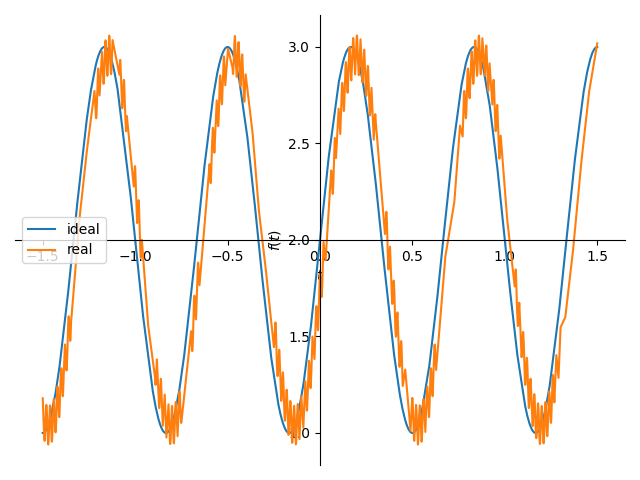

In [57]:
t = sym.symbols('t')
yideal = 2 + sym.sin(3*np.pi*t)
yreal = 2 + 0.96*sym.sin(3*np.pi*t-16.7*np.pi/180) + 0.1*sym.cos(100*np.pi*t+6.7*np.pi/180)

p1 = sym.plot(yideal, (t, -1.5, 1.5), show=False, label='ideal', legend=True)
p2 = sym.plot(yreal, (t, -1.5, 1.5), show=False, label='real')
p1.extend(p2)
p1.show()

---

### Filtro passa-faixas

Um **filtro passa-faixas** ideal tem ganho diferente de zero para uma faixa de frequências que não inclui o zero e não segue até $\infty$.  A faixa de frequências em que o ganho é diferente de zero é a banda-passante do sistema, e as frequências mínimas e máximas dessa faixa são as frequências de corte do sistema.

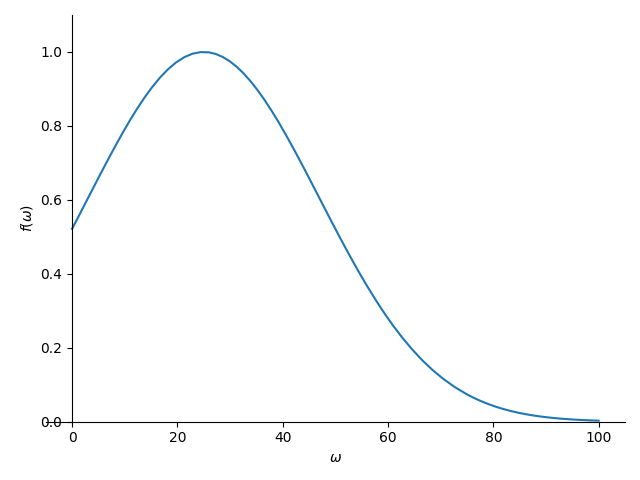

In [67]:
omega = sym.symbols('\omega')
wc1 = 10
wc2 = 40
p1=sym.plot(sym.exp(-(omega-25)**2/(2*480)), (omega, 0, 100), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0.72*wc1, 1.08*wc2])
ax.set_xticklabels([r'$\omega_{c_1}$', r'$\omega_{c_2}$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([0.72*wc1, 0.72*wc1, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([0.72*wc1, 0.72*wc1,1.08*wc2], [0, 1, 1], color='red', ls='--')
ax.plot([1.08*wc2, 1.08*wc2, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([1.08*wc2, 1.08*wc2], [0, 1], color='red', ls='--')
ax.arrow(19, 0.18, -9, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(30, 0.18, 11, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(8, 0.3, 35, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(42, 0.3, -35, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(12, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(25, 0.8, 10, 0.1, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequências de corte')
plt.text(20, 0.32, '  banda \n passante')
plt.text(12.1, 0.5, '  filtro ideal')
plt.text(20, 0.75, '  filtro real')
fig.canvas.draw_idle()

Assim  como acontece com o filtro passa-baixas, o filtro passa-faixas ideal é um sistema não realizável (fica como exercício verificar isso). Por isso são usadas aproximações do sistema ideal que sejam sistemas causais. 

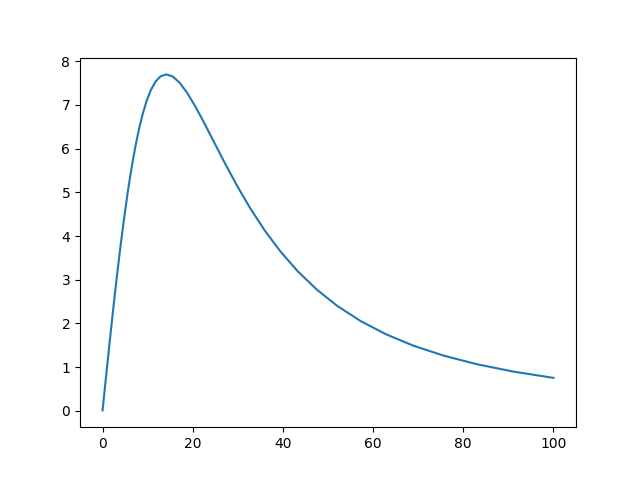

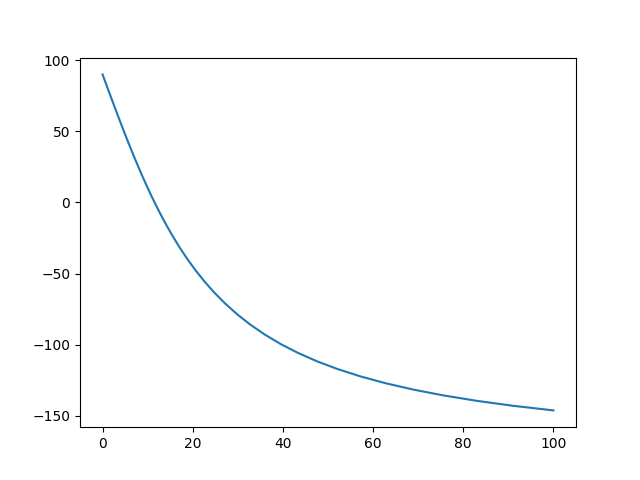

In [71]:
w, G, F = bode(([8000, 0], [1, 60, 1200, 8000]))
plt.figure()
plt.plot(w, 10**(G/20))
plt.show()
plt.figure()
plt.plot(w, F)
plt.show()

### Filtro passa-altas

Um **filtro passa-altas** ideal é um filtro cuja banda-passante corresponde a frequências maiores do que uma frequência de corte.

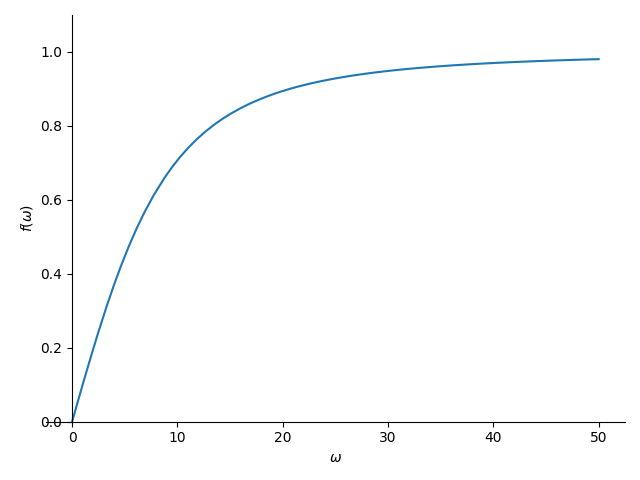

In [72]:
omega = sym.symbols('\omega')
wc = 10
p1=sym.plot(omega/sym.sqrt(omega**2+wc**2), (omega, 0, 50), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([wc])
ax.set_xticklabels([r'$\omega_c$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([wc, wc, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([wc, wc, 50], [0, 1, 1], color='red', ls='--')
ax.arrow(19, 0.18, -7, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(10.2, 0.3, 38, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(48, 0.3, -38, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(14.95, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(40,0.7,-6, 0.25, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequência de corte')
plt.text(30, 0.35, '  banda \n passante')
plt.text(15, 0.5, '  filtro ideal')
plt.text(40, 0.7, '  filtro real')
fig.canvas.draw_idle()

Assim  como acontece com o filtro passa-baixas, o filtro passa-altas ideal é um sistema não realizável (fica como exercício verificar isso). Por isso são usadas aproximações do sistema ideal que sejam sistemas causais. 

## Filtro rejeita-banda

Um **filtro rejeita-banda** ideal é um filtro que tem ganho igual a zero numa faixa de frequência, conhecida como **banda de rejeição**.


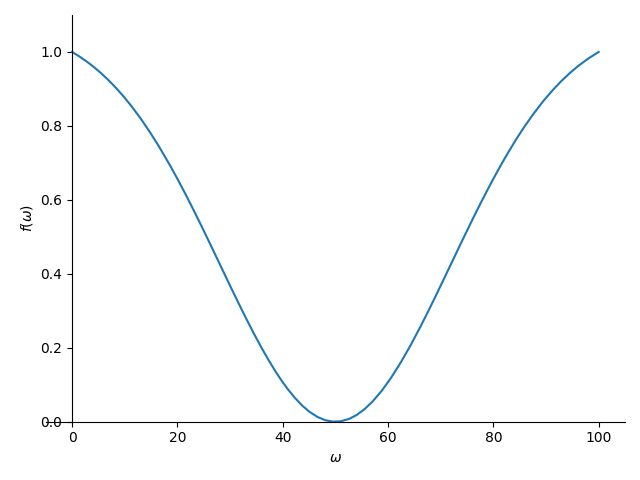

In [77]:
omega = sym.symbols('\omega')
wc1 = 10
wc2 = 40
p1=sym.plot((1-sym.exp(-(omega-50)**2/(2*480)))*1.08, (omega, 0, 100), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([1.8*wc1, 2.05*wc2])
ax.set_xticklabels([r'$\omega_{c_1}$', r'$\omega_{c_2}$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([1.8*wc1, 1.8*wc1, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([1.8*wc1, 1.8*wc1, 0], [0, 1, 1], color='red', ls='--')
ax.plot([2.05*wc2, 2.05*wc2, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([2.05*wc2, 2.05*wc2,100], [0, 1,1], color='red', ls='--')
ax.arrow(30, 0.18, -9, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(50, 0.18, 30, -0.15, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(1.8*wc1+5, 0.85, 58, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(2.05*wc2-5, 0.85, -58, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(12, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(56, 0.48, 13, -0.12, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(30, 0.2, 'frequências de corte')
plt.text(40, 0.9, 'banda de\n rejeição')
plt.text(12.1, 0.5, '  filtro ideal')
plt.text(50, 0.5, '  filtro real')
fig.canvas.draw_idle()

Assim como os outros tipos de filtro, um filtro rejeita-banda ideal não é realizável (fica como exercício verificar isso). Para contornar isso, são utilizadas aproximações utilizando sistemas causais.

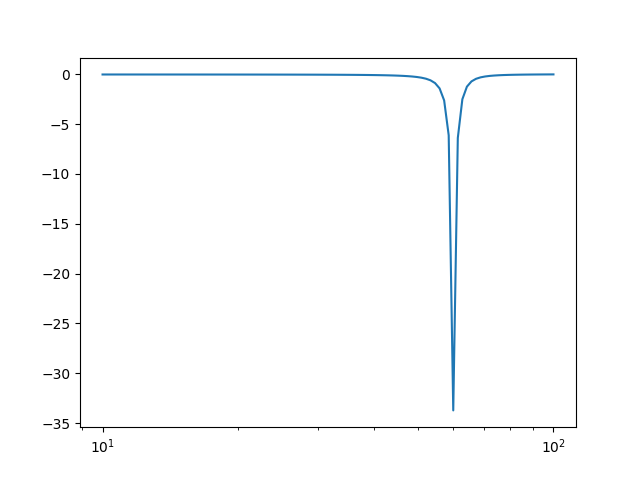

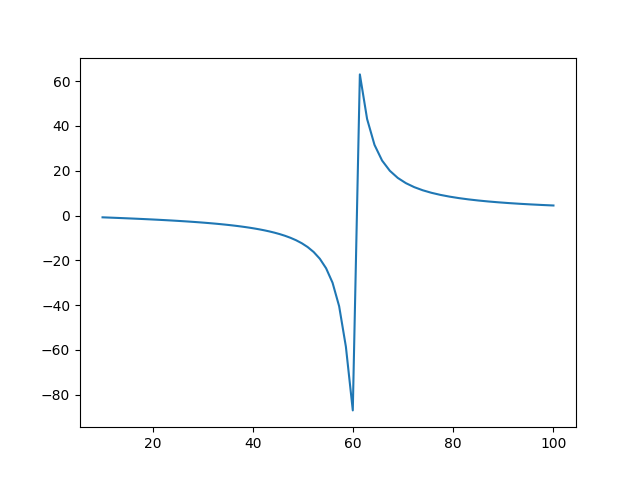

In [76]:
w,ganho,fase= bode(([1,0,3600], [1,5,3609]))
plt.figure()
plt.semilogx(w, ganho)
plt.show()
plt.figure()
plt.plot(w, fase)
plt.show()

### Distorção do sinal de saída

Vamos analisar agora como um filtro muda o sinal de entrada no domínio do tempo. 

### Sistemas inversos

É muito comum 

$H_1(s) = \frac{(s+1)(s+10)}{(s+2)(s+5)} = \frac{s^2+11s+10}{s^2+7s+10}$

$H_2(s) = \frac{(s-1)(s+10)}{(s+2)(s+5)} = \frac{s^2+9s-10}{s^2+7s+10}$

In [21]:
import sympy as sym

omega = sym.symbols('\omega', real=True)
s = sym.symbols('s')

H1 = (s**2+11*s+10)/(s**2+7*s+10)
H2 = (s**2+9*s-10)/(s**2+7*s+10)
H

(s**2 + 11*s + 10)/(s**2 + 7*s + 10)

In [22]:
H1w = H1.subs(s, sym.I*omega)
H2w = H2.subs(s, sym.I*omega)

In [23]:
H1wabs = sym.simplify(sym.Abs(H1w))
H1wfase = sym.simplify(sym.arg(H1w))
H2wabs = sym.simplify(sym.Abs(H2w))
H2wfase = sym.simplify(sym.arg(H2w))

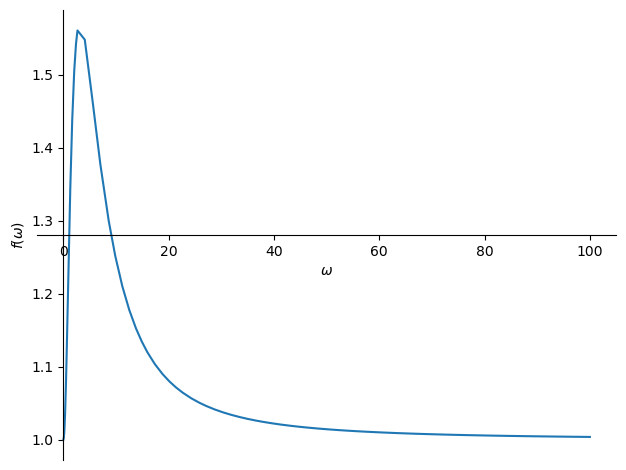

In [24]:
sym.plot(H1wabs, (omega, 0, 100))

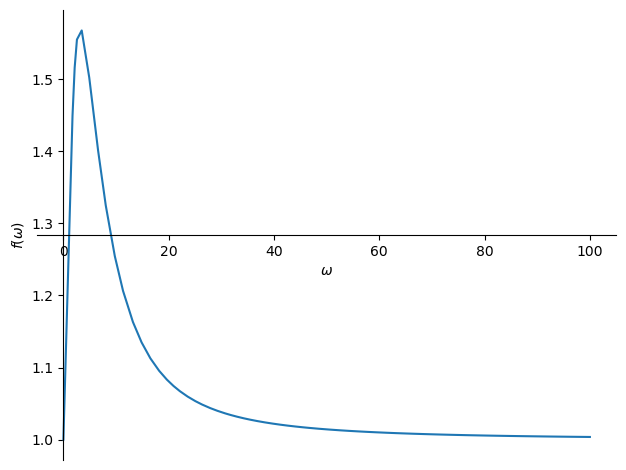

In [27]:
sym.plot(H2wabs, (omega, 0, 100))

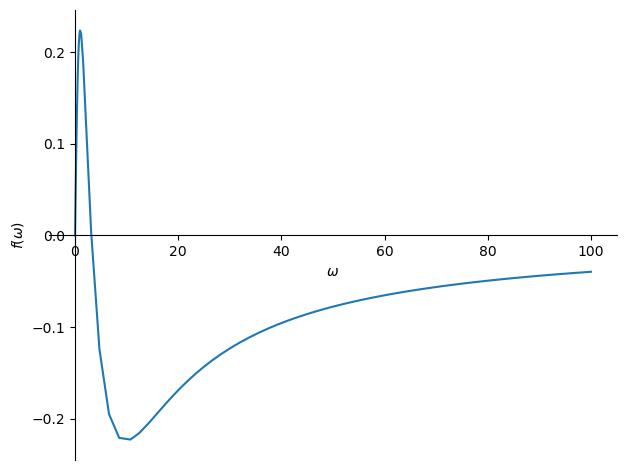

In [25]:
sym.plot(H1wfase, (omega, 0, 100))

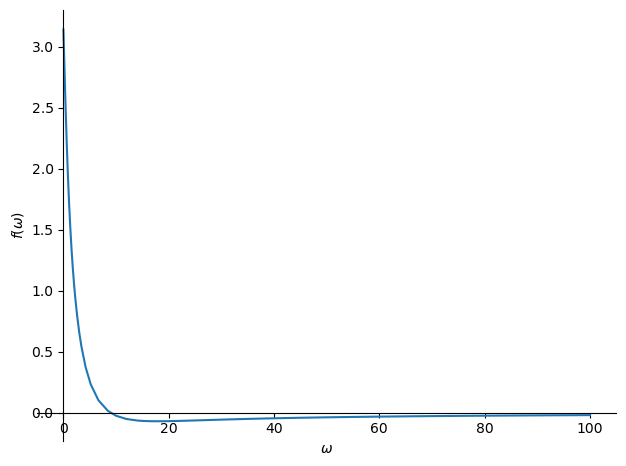

In [26]:
sym.plot(H2wfase, (omega, 0, 100))

## Exercícios

**1)** Faça o gráfico da resposta em frequência e encontre a resposta ao impulso do filtro com a seguinte resposta em frequência:

$H(j\omega) = 0.5\mathrm{rect}(\frac{\omega-30\pi}{20\pi})+0.5\mathrm{rect}(\frac{\omega+30\pi}{20\pi})$

Esboce o gráfico da resposta ao impulso. Esse sistema é realizável?

**2)** Faça o gráfico da resposta em frequência e encontre a resposta ao impulso do filtro com a seguinte resposta em frequência:

$H(j\omega) = 1-\mathrm{rect}(\frac{\omega}{20\pi})$

Esboce o gráfico da resposta ao impulso. Esse sistema é realizável?

**3)** Faça o gráfico da resposta em frequência e encontre a resposta ao impulso do filtro com a seguinte resposta em frequência:

$H(j\omega) = 0.5- 0.5\mathrm{rect}(\frac{\omega-30\pi}{20\pi})- 0.5\mathrm{rect}(\frac{\omega+30\pi}{20\pi})$

Esboce o gráfico da resposta ao impulso. Esse sistema é realizável?

**4)** Considere um fltro com a seguinte função de transferência (esse filtro é conhecido como filtro notch, utilizado para remover interferência da rede elétrica):

$H(s) =  \frac{(s-j60)(s+j60)}{(s+3-j60)(s+3+j60)}$

a) Qual a equação diferencial desse sistema?

b) Faça o gráfico da sua resposta em frequência (pode usar alguma linguagem computacional).

c) Esse filtro é de que tipo?

d) Quais as frequências de corte desse filtro. 

e) Qual a banda de rejeição do filtro?

**5)** 